In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [5]:
#Load dataset
df = pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [65]:
#Identify numerical columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


* Numerical columns are
* Ans -> Volume, AVG Price , Total Sales Value, Discount Rate (%), Discount Amount and Net Sales Value.
* Calculate the mean, median, mode, and standard deviation for these columns.

In [66]:
df1 = df.select_dtypes(include=['int64','float64']) #or df2 = df[['Volume','Avg Price']]
mean = df1.mean()
print(mean)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [67]:
median = df1.median()
print(median)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [68]:
mode = df1.mode()
print(mode)


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                ...              ...   
445     NaN        NaN                NaN          19.940610     17900.983733   
446     NaN        NaN                NaN          19.965340     21153.498820   
447     NaN        NaN                NaN          19.976879     21496.675367   
448     NaN        NaN                NaN          19.982257     25328.224204   
449     NaN        NaN                NaN          19.992407     25738.022194   

     Net Sales Value  
0   

In [69]:
std = df1.std()
std

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

###### mean, median and mode is used to find the central tendency of the data, while mode is used to find central tendency for attributes
###### std helps in finding dipersion of data from central tendency


# Data Visualisation

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

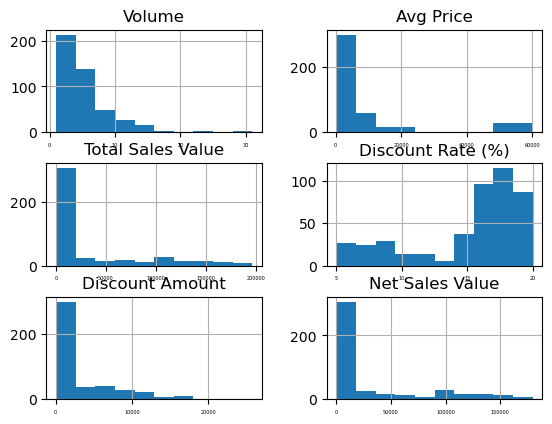

In [70]:
df1.hist(xlabelsize = 3.5)

<Axes: >

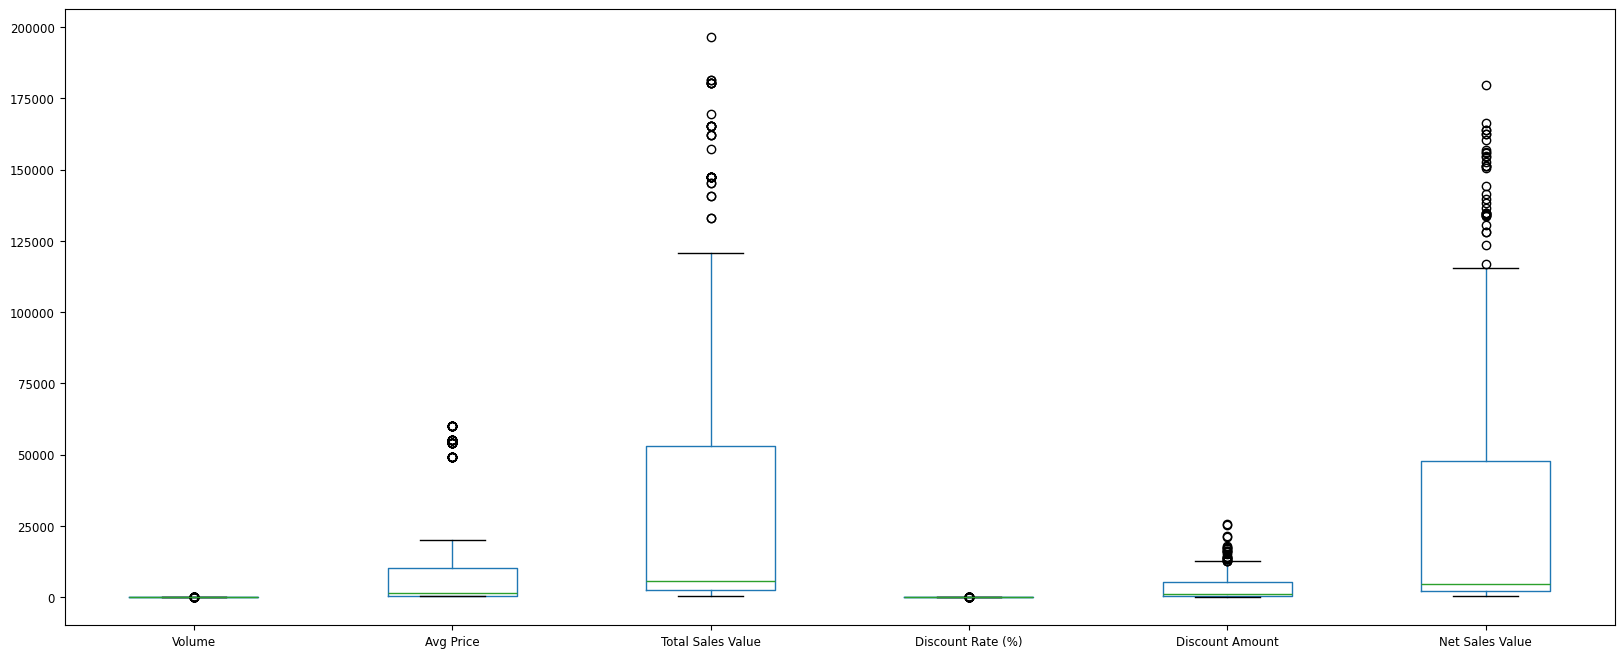

In [71]:
df1.boxplot(figsize = (20,8), fontsize= 8.5 , grid= False)

###### Volume = positive skewness, hardly any outlier
###### Avg Price= positive skewness, outliers are present
###### Total Sales Value = positive skewness, many outliers
###### Discount Rate =  negative skewness, hardly any outlier
###### Discount Amt = positive skewness with outliers
###### net sales Value = positive skewness with many outliers

In [72]:
df2 = df.select_dtypes(include = 'object')
df2 = df2.drop(['Date'], axis = 1)
df2

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


<Axes: xlabel='count', ylabel='Day'>

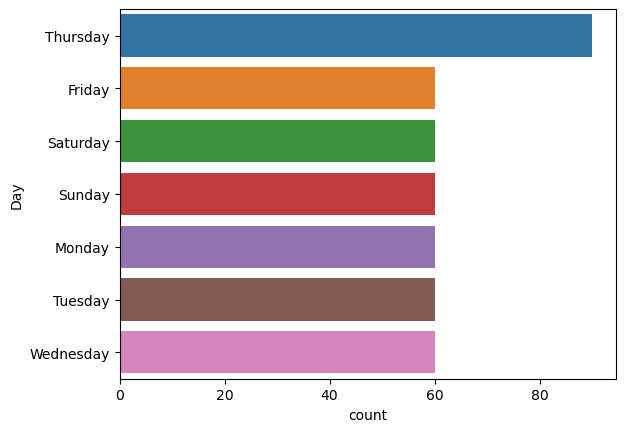

In [73]:
sns.countplot(y= "Day",  data = df2)

In [74]:
df2['Day'].value_counts()

Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='SKU'>

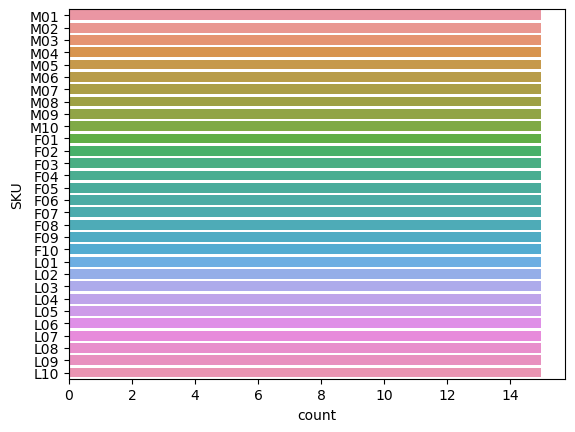

In [75]:
sns.countplot(y= "SKU",  data = df2)

<Axes: xlabel='count', ylabel='City'>

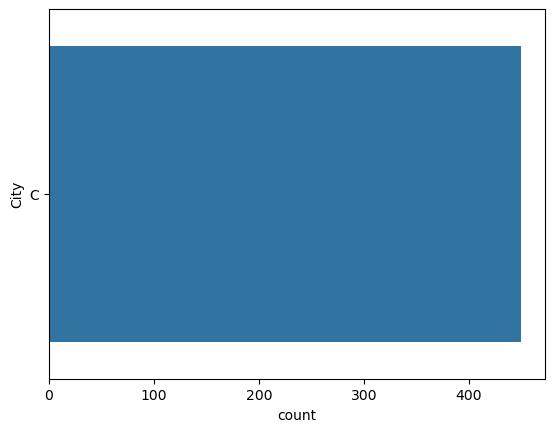

In [76]:
sns.countplot(y= "City",  data = df2)

<Axes: xlabel='count', ylabel='BU'>

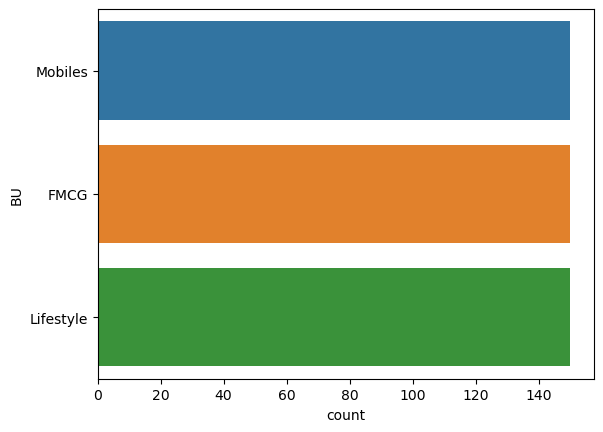

In [77]:
sns.countplot(y= "BU",  data = df2)

<Axes: xlabel='count', ylabel='Brand'>

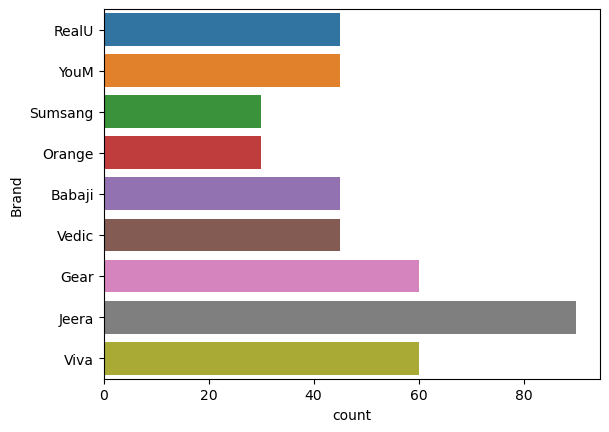

In [78]:
sns.countplot(y= "Brand",  data = df2)

<Axes: xlabel='count', ylabel='Model'>

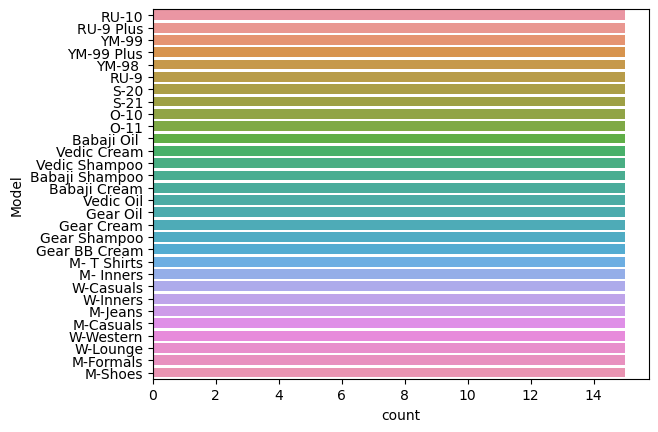

In [79]:
sns.countplot(y= "Model",  data = df2)


###### There is only city C, 9 brands of which jeera is a leading brand, overall the freuency count of models and SKU appeared equal.
###### there are more counts from Day Thursday

In [80]:
df1.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


#### Standardization, also known as Z-score normalization, is a technique used to transform numerical variables to have a mean of 0 and a standard deviation of 1. This process makes the variables comparable and brings them to a common scale, which is particularly useful for analytical models, as it ensures that no single feature dominates due to its scale. 

In [81]:
from sklearn.preprocessing import StandardScaler


In [82]:
#create as a object
scaler = StandardScaler()


In [83]:
standardized_data = StandardScaler().fit_transform(df1)

In [84]:
print(standardized_data)

[[ 2.35002911  0.091173    2.92572115 -0.83028851  3.95281631  2.80475594]
 [ 1.16712855 -0.01957016  1.33099521 -0.85266145  1.84901409  1.2710262 ]
 [ 0.45738822  0.31265934  1.56277525 -1.35163138  1.62299458  1.54567497]
 ...
 [-0.72551234 -0.49022863 -0.60644824  0.90379261 -0.60813967 -0.60192115]
 [-0.48893223 -0.47361715 -0.55692259  0.38847428 -0.53037877 -0.55549857]
 [-0.96209245 -0.40717125 -0.60842926  0.04223476 -0.63734468 -0.60123949]]


In [85]:
stan_data = pd.DataFrame(standardised_data, columns= ['Volume' ,	'Avg Price',	'Total Sales Value' ,	'Discount Rate (%)', 'Discount Amount' ,	'Net Sales Value'])

In [86]:
stan_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


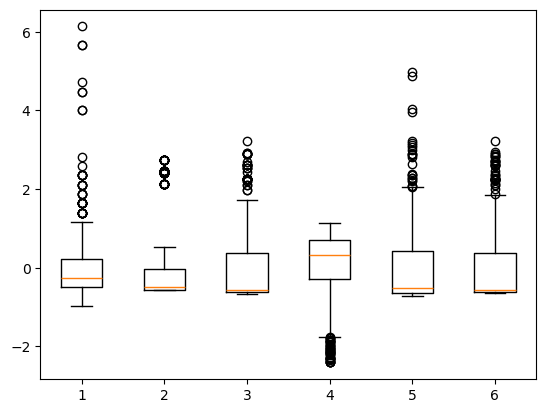

In [87]:
plt.boxplot(stan_data)
plt.show()


In [88]:
#or we can standardize the numerical columns by usung formula z= x- mean/ sigma

In [89]:
df1.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [90]:
mean = np.mean(df1, axis =0)
std = np.std(df1,axis = 0)
mean

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [91]:
standardised_data = (df1 - mean)/ std

In [92]:
print(standardised_data)


       Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    2.350029   0.091173           2.925721          -0.830289   
1    1.167129  -0.019570           1.330995          -0.852661   
2    0.457388   0.312659           1.562775          -1.351631   
3    0.220808   0.534146           1.719276          -1.949723   
4   -0.488932  -0.130313          -0.188452           0.673739   
..        ...        ...                ...                ...   
445 -0.725512  -0.506840          -0.618334           0.076009   
446  0.220808  -0.434857          -0.360801           0.451097   
447 -0.725512  -0.490229          -0.606448           0.903793   
448 -0.488932  -0.473617          -0.556923           0.388474   
449 -0.962092  -0.407171          -0.608429           0.042235   

     Discount Amount  Net Sales Value  
0           3.952816         2.804756  
1           1.849014         1.271026  
2           1.622995         1.545675  
3           1.113807         1.765810  
4      

# Conversion of Categorical Data into Dummy Variables

In [93]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [94]:
## Machine learning algorithms typically require numerical input. Without encoding categorical variables, algorithms may 
## misinterpret the ordinality or hierarchy in the categories.
##One-hot encoding avoids this by creating binary columns for each category, removing any implicit ordering.

In [95]:
dfcat = df.select_dtypes( include = ['object'])
dfcat1 = dfcat.drop( ['Date'] , axis = 1 )

In [96]:
dfcat1

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [97]:
pd.get_dummies(dfcat1, dtype= int)

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Conclusion

 * Key Findings from Descriptive Analytics and Data Visualizations:  
The data contains outliers, and most of the numerical columns exhibit positive skewness.

 * The Role of Data Preprocessing in Analysis and Machine Learning:
 #### Standardization:
   * This process adjusts the features to have a mean of 0 and a standard deviation of 1. Standardization is crucial because it aligns the scale of all features, preventing variables with larger ranges from dominating the model. It also helps algorithms perform better by centering the features around zero, ensuring stable and fair comparisons.
 #### One-Hot Encoding: 
 * This method converts categorical variables into binary vectors. Many machine learning algorithms require this transformation as they cannot process categorical data directly. One-hot encoding ensures that each category is treated separately, avoiding any implied ordinality or hierarchy among categories, which could mislead the model.
